# Importar bibliotecas necessárias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 01 Análise Descritiva

Carregar o Dataframe e verificar as primeiras linhas

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DNC/Engenharia de Dados/Matéria 4/MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


verificar informações gerais sobre o dataframe

In [3]:
df.info()
# Observa-se que não há valores faltantes no DataFrame, o que é positivo para a análise.
# Todas as variáveis são numéricas (float64), o que é adequado para a construção
# de um modelo de regressão.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Verificar estatísticas descritivas

In [4]:
df.describe()

# A média dos gastos em 'youtube' é 178.02, em 'facebook' é 27.67, em 'newspaper' é 35.24, e as vendas ('sales') têm uma média de 16.92.

# 'youtube' tem a maior dispersão (102.45), seguido por 'newspaper' (24.90), 'facebook' (17.91) e 'sales' (6.31).
# Isso indica que os gastos em 'youtube' variam mais em comparação com as outras variáveis.
# os gastos em 'youtube' variam de 0.84 a 355.68,
# enquanto as vendas variam de 1.92 a 32.40.

# 25% dos valores de 'youtube' estão abaixo de 91.08,
# 50% estão abaixo de 179.76 (mediana), e 75% estão abaixo de 262.98.



,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Verificar a presença de valores nulos

In [5]:
df.isnull().sum()
# Confirmada a ausencia de nulos

,0
youtube,0
facebook,0
newspaper,0
sales,0


# 02 Analise Exploratória

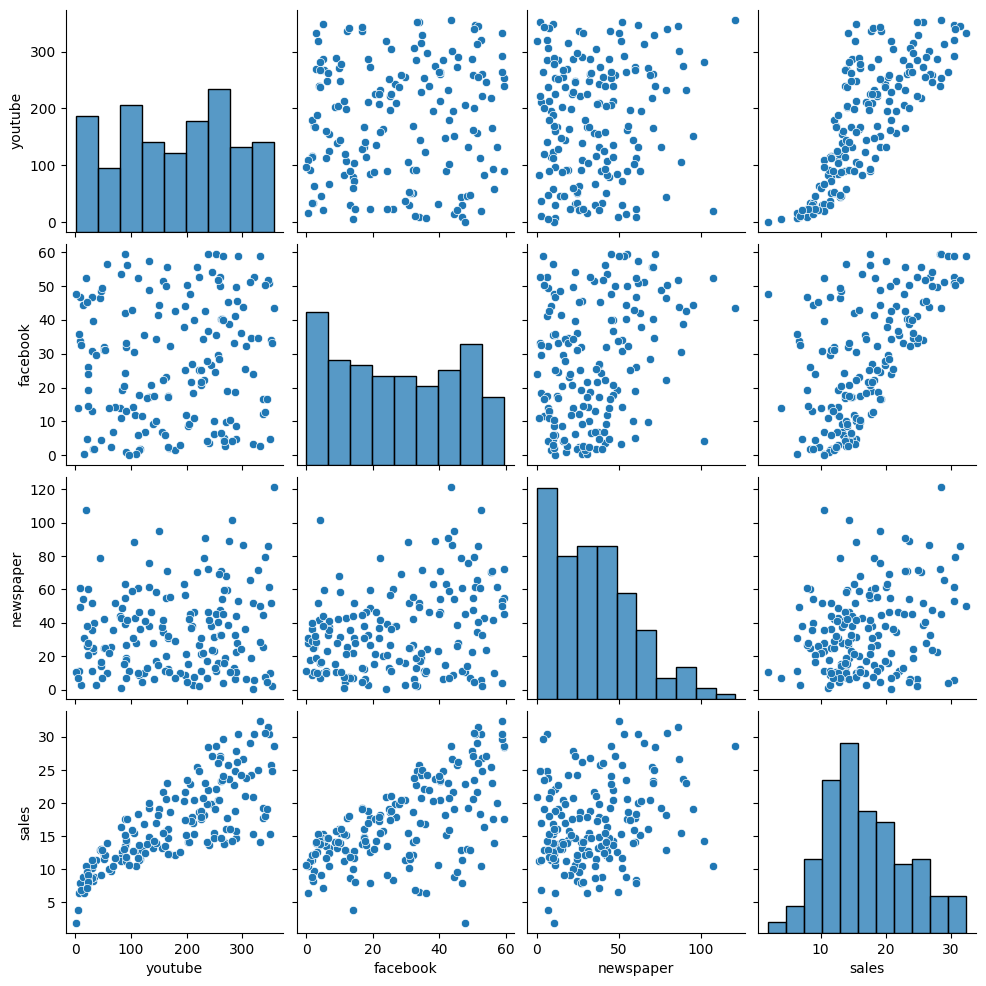

In [6]:
sns.pairplot(df)
plt.show()


Verificar a distribuição da variáveis

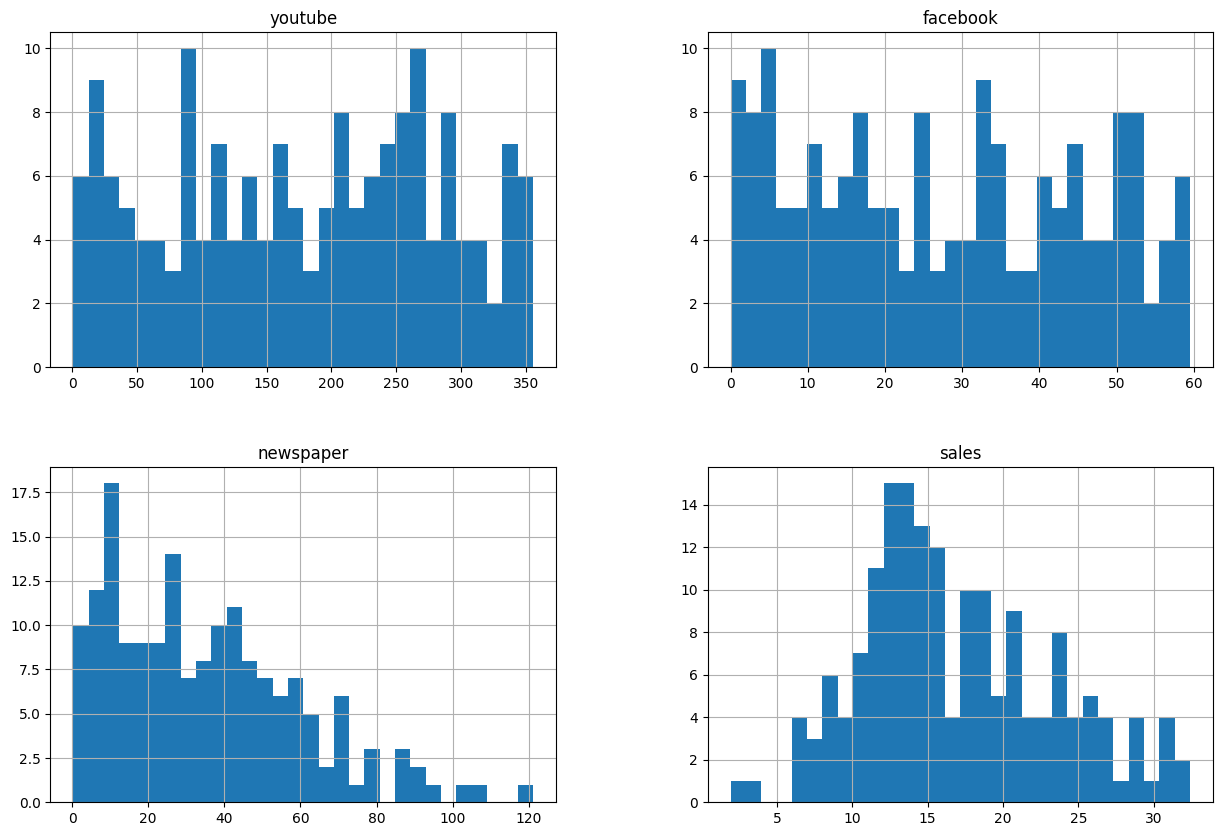

In [7]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

Verificar correlação entre as variáveis

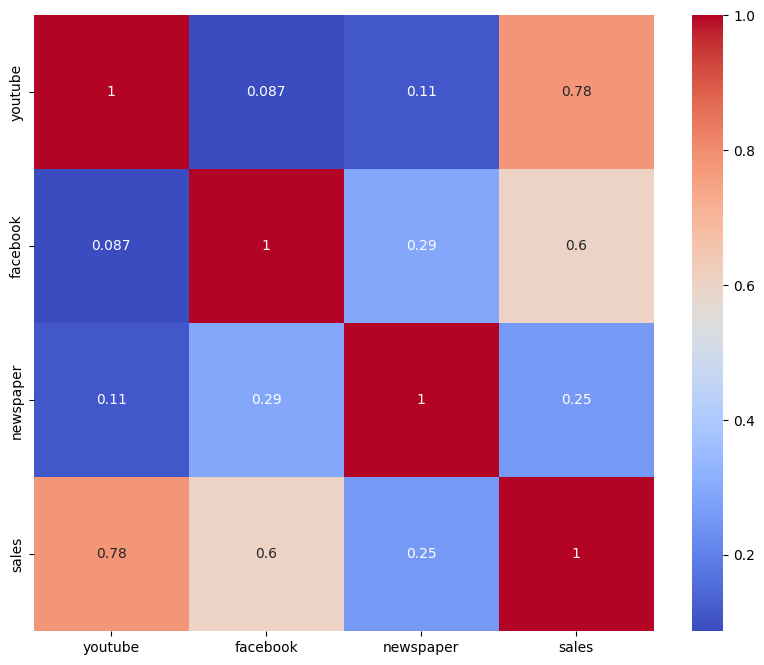

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Verificar outliers

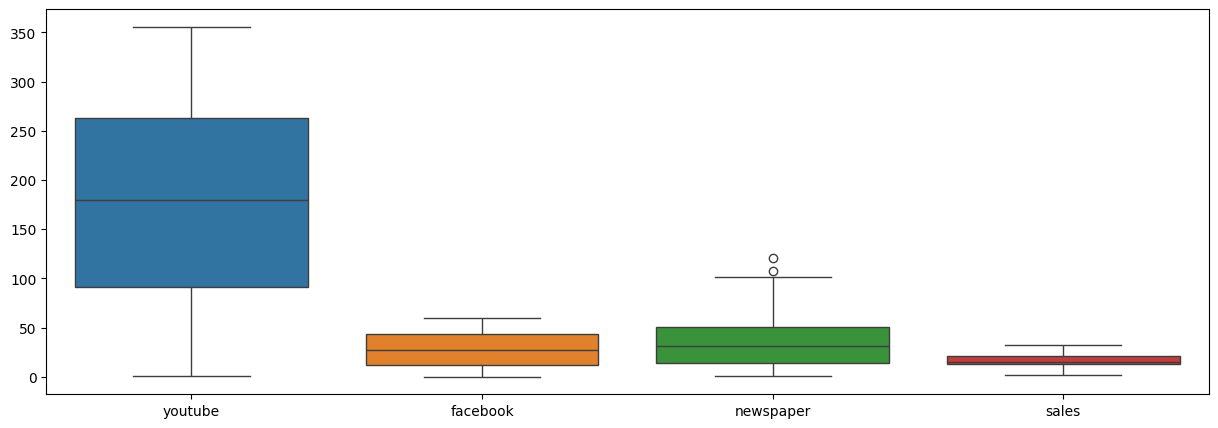

In [9]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.show()

In [10]:
# Entedendo melhor possíveis outliers da coluna newspaper
# Calcular o IQR
Q1 = df['newspaper'].quantile(0.25)
Q3 = df['newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar os outliers
outliers = df[(df['newspaper'] < lower_bound) | (df['newspaper'] > upper_bound)]
print(outliers)

    youtube  facebook  newspaper  sales
46    20.28     52.44     107.28  10.44
72   355.68     43.56     121.08  28.56


## Comentários Gerais da Seção 02 Analise Exploratória
1. Relação entre 'youtube' e 'sales':
Há uma correlação positiva visível entre os gastos em anúncios no YouTube e as vendas.
Isso significa que, à medida que os gastos em YouTube aumentam, as vendas também tendem a aumentar.

2. Relação entre 'facebook' e 'sales':
A correlação entre os gastos em anúncios no Facebook e as vendas é menos clara.
Pode haver uma leve tendência positiva, mas não é tão forte quanto a relação entre YouTube e vendas.

3. Relação entre 'newspaper' e 'sales':
A correlação entre os gastos em anúncios em jornais e as vendas é fraca.
Isso sugere que os anúncios em jornais podem não ter um impacto significativo nas vendas.

4. Distribuição das Variáveis:
Os histogramas na diagonal principal mostram a distribuição de cada variável.
Por exemplo, os gastos em YouTube têm uma distribuição mais ampla, enquanto os gastos em Facebook e jornais têm distribuições mais concentradas.

5. Outliers:
Existem alguns outliers visíveis, especialmente nos gráficos de dispersão envolvendo 'newspaper'.
Esses pontos fora do padrão podem influenciar a análise e devem ser investigados mais a fundo.

6. Relações entre Outras Variáveis:
As relações entre 'youtube', 'facebook' e 'newspaper' também são visíveis.
Por exemplo, pode haver uma leve correlação positiva entre 'youtube' e 'facebook', indicando que empresas que gastam mais em YouTube também tendem a gastar mais em Facebook.

# 03 Modelagem

### Criar modelo de regressão

In [12]:
df.columns.tolist()

['youtube', 'facebook', 'newspaper', 'sales']

In [14]:
# Variáveis independentes
X = df[['youtube', 'facebook', 'newspaper']]
 # Variável dependente (alvo)
y = df['sales']

In [20]:
# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Exibindo os coeficientes do modelo
print("Coeficientes do modelo:")
print(f'YouTube: {model.coef_[0]}')
print(f'Facebook: {model.coef_[1]}')
print(f'Newspaper: {model.coef_[2]}')

# YouTube: Tem uma influência positiva moderada nas vendas.
# Facebook: Tem a maior influência positiva nas vendas.
# Newspaper: Tem uma influência insignificante ou ligeiramente negativa nas vendas.

Coeficientes do modelo:
YouTube: 0.0441858407408404
Facebook: 0.19448197522021865
Newspaper: -4.883410929940046e-05


# 04 Predição

In [22]:
# Calculando as previsões do modelo
y_pred = model.predict(X_test)

In [29]:
# Avaliação do modelo - Métricas para medir o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)

# Calculando o RMSE de maneira compatível
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

r2 = r2_score(y_test, y_pred)

print(f'MAE (Erro Absoluto Médio): {mae}')
print(f'RMSE (Erro Quadrático Médio): {rmse}')
print(f'R² Score (Coeficiente de Determinação): {r2}')


# O R² de aproximadamente 0.873 indica que o modelo é capaz de explicar 87.3% da
# variabilidade nas vendas com base nos investimentos em marketing. Este é um valor
# alto e sugere que o modelo é eficaz em capturar a relação entre os investimentos e
# as vendas, sendo bastante confiável para previsões.


MAE (Erro Absoluto Médio): 1.4034372074821055
RMSE (Erro Quadrático Médio): 2.361522863329236
R² Score (Coeficiente de Determinação): 0.872863085701216
